# Exploring Covid 19 Data by country

In [1]:
# Configure Jupyter so figures appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import pandas as pd

## Load country population data

Source: https://datahub.io/JohnSnowLabs/population-figures-by-country#resource-population-figures-by-country-csv

In [2]:
filepath_CSV = "C:/Users/julia.baldauf/Desktop/Julia/Scripts/covid-19/data/population-figures-by-country-csv_csv.csv"
country_population = pd.read_csv(filepath_CSV)

In [3]:
@interact
def show_articles_more_than(column='Confirmed', x=50):
    return country_population.loc[x:x+10]

interactive(children=(Text(value='Confirmed', description='column'), IntSlider(value=50, description='x', max=…

### Helper functions to get population number

In [4]:
def get_population_number(country_name):
    mask = country_population.apply(lambda row: row['Country'] == country_name, axis=1)
    if len(country_population[mask]['Year_2016']) == 0:
        return 0
    else:
        return int(country_population[mask]['Year_2016'])

## Load covid data


Source: https://github.com/datasets/covid-19

In [5]:
filepath_CSV = "C:/Users/julia.baldauf/Desktop/Julia/Scripts/covid-19/data/time-series-19-covid-combined.csv"
covid19_data = pd.read_csv(filepath_CSV, delimiter=',')

In [6]:
covid19_data.columns

Index(['Date', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [7]:
covid19_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
@interact
def show_articles_more_than(column='Confirmed', x=50):
    return covid19_data.loc[x:x+10]

interactive(children=(Text(value='Confirmed', description='column'), IntSlider(value=50, description='x', max=…

### Helper functions to extract country specific data and plot it

In [16]:
def get_country_data(country_name, state):
    if state == '':
        covid19_data_country_mask = covid19_data.apply(lambda row: row['Country/Region'] == country_name, axis=1)
    else:
        covid19_data_country_mask = covid19_data.apply(lambda row: row['Country/Region'] == country_name and row['Province/State'] == state, axis=1)
    covid19_data_country = covid19_data[covid19_data_country_mask].reset_index()
    return covid19_data_country

In [28]:
def plot_country_data(country_name, state = ''):
    country_data= get_country_data(country_name, state)
    if len(country_data) == 0:
        print('No data found. Is the country and state name valid and occurs in the list above?')
        return
    country_population = get_population_number(country_name)/100
    yaxis_label = '% of population'
    if country_population == 0:
        country_population = 1
        print('No country population data was found. Plotting the numbers')
        yaxis_label = 'Number of peope'
    plt.plot(country_data['Date'], country_data['Confirmed']/country_population, color='blue',label='confirmed')
    plt.plot(country_data['Date'], country_data['Recovered']/country_population, color='green', label='recovered')
    plt.plot(country_data['Date'], country_data['Deaths']/country_population, color='black', label='passed away')
    plt.plot(country_data['Date'], (country_data['Confirmed']-country_data['Recovered'])/country_population, color='red',label='sick')
    plt.legend()
    plt.ylabel(yaxis_label)
    plt.xlabel('Date')
    plt.title(f'Covid19 spread in {country_name}')
    plt.show()

## Examples

#### Germany - actions taken from mid March

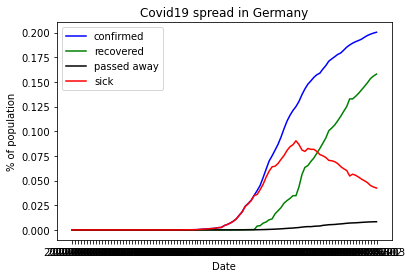

In [23]:
plot_country_data('Germany')

#### Russia - actions taken later

No country population data was found. Plotting the numbers


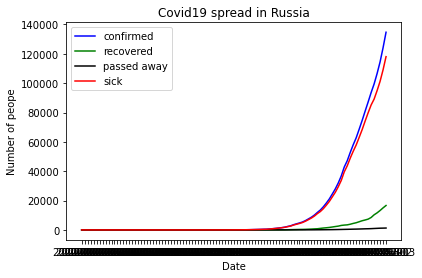

In [24]:
plot_country_data('Russia')

#### Sweden not reinforcing actions

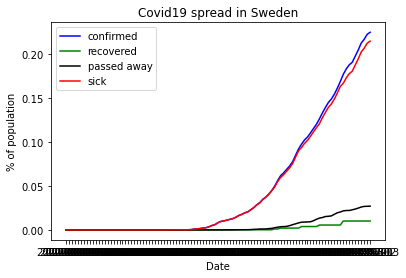

In [25]:
plot_country_data('Sweden')

In [27]:
plot_country_data('Australia', 'Queensland')

No data found. Is the country name valid and occurs in the list above?
